# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

<h3>Import Data Set <code>Advertising.csv</code></h3>

In [2]:
# Data Set reference from url: "kaggle.com/datasets/bumba5341/advertisingcsv/data"
url_dataset = 'https://raw.githubusercontent.com/panyakorn5058/Prediction_Data_using_Linear_Regression_Model/main/Advertising.csv'
df_Ad = pd.read_csv(url_dataset)
df_Ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,57,7.3,28.1,41.4,5.5
1,127,7.8,38.9,50.6,6.6
2,133,8.4,27.2,2.1,5.7
3,6,8.7,48.9,75.0,7.2
4,159,11.7,36.9,45.2,7.3


In [3]:
df_Ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  194 non-null    int64  
 1   TV          194 non-null    float64
 2   Radio       194 non-null    float64
 3   Newspaper   194 non-null    float64
 4   Sales       194 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.7 KB


In [4]:
df_Ad.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
df_Ad.drop('Unnamed: 0', axis=1, inplace=True)

<h4> Calculate <code>Correlation Coefficient (Pearson's)</code> for display relation of data</h4>
<h2>$$r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}$$</h2>
<h4>or use function<code>dataframe.corr()</code></h4>

<Axes: >

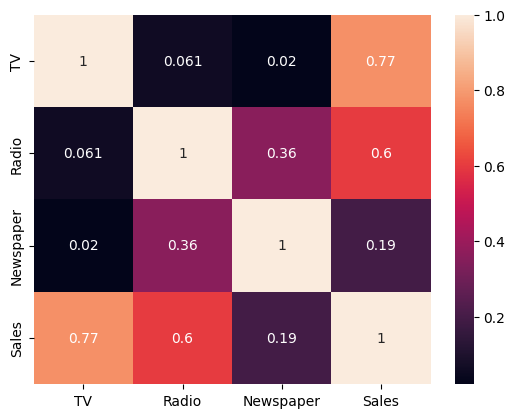

In [6]:
sns.heatmap(df_Ad.corr(), annot=True)

<h3>Scatter Plot</h3>

In [7]:
go.Figure(go.Scatter(x=df_Ad.TV, y=df_Ad.Sales, mode='markers', name='Data'))

<h3>Data Spliting <code>Train Test Split</code></h3>

In [8]:
# Train test split
X = np.array(df_Ad.TV)
y = np.array(df_Ad.Sales)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 58 699199

In [9]:
print(f"X_train size = {X_train.size} \ny_train size = {y_train.size} \n------------------")
print(f"X_test size = {X_test.size} \ny_test size = {y_test.size}")

X_train size = 145 
y_train size = 145 
------------------
X_test size = 49 
y_test size = 49


<h3>SSE (Sum of Squares Error) Calculation when {intercept = 0, slope = 0}</h3>
<h2>$$SSE=\sum_{i=0}^n(y_i - \hat{y_i})^2$$</h2>

In [10]:
# SSE when intercept and slope = 0
y_hat = 0 + 0 * X_train
SSE_0 = np.sum((y_train - y_hat)**2)

scientific_notation = "{:e}".format(SSE_0)
print(f"SSE_0 = {SSE_0}, {scientific_notation}")

SSE_0 = 32460.809999999998, 3.246081e+04


<h3>Create function <code>gradient_descent()</code> for approximate parameters {Intercept, Slope} use</h3>
<h2>$$intercept_{new}=intercept_{old}-({\frac{\partial{SSE}}{\partial{intercept}}}\alpha)$$</h2>
<h2>$$slope_{new}=slope_{old}-({\frac{\partial{SSE}}{\partial{slope}}}\alpha)$$</h2>
<h3>where $$ \alpha = Learning Rate$$</h3>

In [11]:
def gradeint_descent(X, y, learning_rate, iteration, round_epochs):
    intercept = 0
    slope = 0
    sse_list = []
    with tqdm(total = iteration) as pbar:
        for i in range(iteration):
            sse = np.sum((y - intercept - slope * X) ** 2)
            diff_sse_intercept = np.sum(-2 * (y - intercept - slope * X))
            diff_sse_slope = np.sum(-2 * (y - intercept - slope * X) * X)

            step_size_intercept = diff_sse_intercept * learning_rate
            step_size_slope = diff_sse_slope * learning_rate

            intercept = intercept - step_size_intercept
            slope = slope - step_size_slope

            sse_list.append(sse)

            if (i + 1) % round_epochs == 0:
                pbar.set_description(f'Iterate: {i + 1}, SSE: {sse}')
                pbar.update(round_epochs)
    return intercept, slope, sse_list

<h3>Approximation Parameter Values (Training)</h3>

Iterate: 1000000, SSE: 1587.5295553566953: 100%|██████████| 1000000/1000000 [00:21<00:00, 46246.66it/s]

Intercept = 7.437599674077778, slope = 0.04469388760847014, 
Maximum of SSE = 32460.809999999998 
Minimum of SSE = 1587.5295553566953


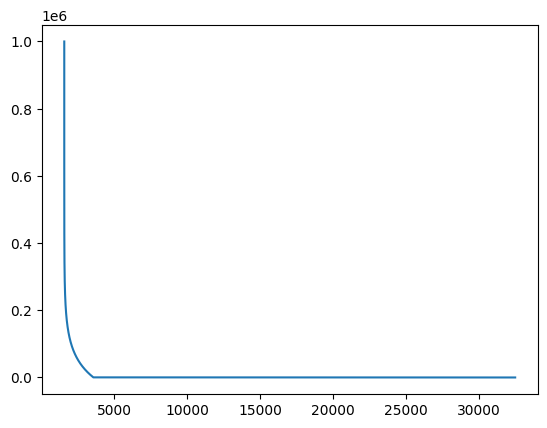

In [12]:
iteration = 1000000 # 1M
learn_rate = 1e-7 # 0.0000001
intercept, slope, sse_list = gradeint_descent(X_train, y_train, learn_rate, iteration, 10000)
print(f"Intercept = {intercept}, slope = {slope}, \nMaximum of SSE = {sse_list[0]} \nMinimum of SSE = {sse_list[-1]}")

rng = np.arange(iteration)
plt.plot(sse_list, rng)
plt.show()

<h3>Scatter Plot with Regression Line</h3>

In [13]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = X_train, y = y_train, mode = 'markers', name = 'Data Point'))
fig.add_trace(go.Scatter(x = X_train, y = intercept + slope * X_train, mode = 'lines', name = 'Linear Regression'))
fig.update_layout(
    xaxis_title="TV (Ad Spending)",
    yaxis_title="Sales"
)

<h3>SSE (Sum of Squares Error) Calculation after approximate parameters values</h3>
<h2>$$SSE=\sum_{i=0}^n(y_i - \hat{y_i})^2$$</h2>

In [14]:
# SSE after approximate intercept and slope = 0
y_pred_train_set = intercept + slope * X_train

SSE = np.sum((y_train - y_pred_train_set)**2)

scientific_notation = "{:e}".format(SSE)
print(f"SSE = {SSE}, {scientific_notation}")

SSE = 1587.5295553412589, 1.587530e+03


<h3>R-Squared</h3>


In [15]:
y_pred_test_set = intercept + (slope * X_test)

r2 = r2_score(y_test, y_pred_test_set)
print(f"R-squared: {r2}")

R-squared: 0.6742410534318501


In [16]:
# Prediction
Ad_spen_TV = float(input())
predict_sales = intercept + slope * Ad_spen_TV
print(f"Ad Spending of TV = {Ad_spen_TV} units\n----------------------------------\nPrediction of Sales = {round(predict_sales, 4)} units")

Ad Spending of TV = 10.0 units
----------------------------------
Prediction of Sales = 7.8845 units


In [ ]:
# install module "gradio"
!pip install gradio

In [18]:
import gradio as gr

def prediction(X):
    y_pred = intercept + slope * X
    return round(y_pred, 4)

demo = gr.Interface(
    fn=prediction,
    inputs=["number"],
    outputs=["text"],
)

demo.launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
